<a href="https://colab.research.google.com/github/AvaneSauhard/MentalStateClassification/blob/main/MentalStateClassificationFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample
import itertools
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#read CSV File
AF7 = pd.read_csv("/content/drive/MyDrive/eeg data/AF7.csv",header=None)
TP9 = pd.read_csv("/content/drive/MyDrive/eeg data/TP9.csv",header=None)
TP10 = pd.read_csv("/content/drive/MyDrive/eeg data/TP10.csv",header=None)
AF8 = pd.read_csv("/content/drive/MyDrive/eeg data/AF8.csv",header=None)
AF7.shape
TP9.shape
TP10.shape
AF8.shape



(12, 11365)

In [ ]:


#data = [AF7,AF8,TP9,TP10]
#newdata=pd.concat(data,axis=1,ignore_index=True)
#display(newdata)


In [ ]:
AF7.isnull().sum()
AF8.isnull().sum()
TP9.isnull().sum()
TP10.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
11360    0
11361    0
11362    0
11363    0
11364    0
Length: 11365, dtype: int64

In [ ]:
AF7[11364]=AF7[11364].astype('int')
AF8[11364]=AF8[11364].astype('int')
TP9[11364]=TP9[11364].astype('int')
TP10[11364]=TP10[11364].astype('int')

In [ ]:
AF7_0 = AF7[AF7[11364]==0]
AF7_1 = AF7[AF7[11364]==1]
AF7_2 = AF7[AF7[11364]==2]

AF8_0 = AF8[AF8[11364]==0]
AF8_1 = AF8[AF8[11364]==1]
AF8_2 = AF8[AF8[11364]==2]

TP9_0 = TP9[TP9[11364]==0]
TP9_1 = TP9[TP9[11364]==1]
TP9_2 = TP9[TP9[11364]==2]

TP10_0 = TP10[TP10[11364]==0]
TP10_1 = TP10[TP10[11364]==1]
TP10_2 = TP10[TP10[11364]==2]





In [ ]:
AF7_0 = AF7_0.iloc[:,:-1]
AF7_1 = AF7_1.iloc[:,:-1]
AF7_2 = AF7_2.iloc[:,:-1]

AF8_0 = AF8_0.iloc[:,:-1]
AF8_1 = AF8_1.iloc[:,:-1]
AF8_2 = AF8_2.iloc[:,:-1]

TP9_0 = TP9_0.iloc[:,:-1]
TP9_1 = TP9_1.iloc[:,:-1]
TP9_2 = TP9_2.iloc[:,:-1]

TP10_0 = TP10_0.iloc[:,:-1]
TP10_1 = TP10_1.iloc[:,:-1]
TP10_2 = TP10_2.iloc[:,:-1]



In [ ]:

def generatenoise(data_n):
  dfn  = pd.DataFrame()
  
  for row in range(len(data_n)):
    mu = 0
    sigma = 1
    for j in range(0,10):
      noise = np.random.normal(mu,sigma,size = data_n.iloc[[row]].shape)
      df  = pd.DataFrame()
      df = data_n.iloc[[row]] + 0.2*noise
      dfn = pd.concat([dfn,df], axis = 0, ignore_index = True)

    for j in range(0,10):
      noise = np.random.normal(mu,sigma,size = data_n.iloc[[row]].shape)
      df  = pd.DataFrame()
      df = data_n.iloc[[row]] + 0.3*noise
      dfn = pd.concat([dfn,df], axis = 0, ignore_index = True)
      
  return dfn



In [ ]:
AF7_n0 = generatenoise(AF7_0)
AF7_n1 = generatenoise(AF7_1)
AF7_n2 = generatenoise(AF7_2)

AF8_n0 = generatenoise(AF8_0)
AF8_n1 = generatenoise(AF8_1)
AF8_n2 = generatenoise(AF8_2)

TP9_n0 = generatenoise(TP9_0)
TP9_n1 = generatenoise(TP9_1)
TP9_n2 = generatenoise(TP9_2)

TP10_n0 = generatenoise(TP10_0)
TP10_n1 = generatenoise(TP10_1)
TP10_n2 = generatenoise(TP10_2)

In [ ]:
AF7_0 = pd.concat([AF7_0, AF7_n0], axis=0, ignore_index = True)
AF7_1 = pd.concat([AF7_1, AF7_n1], axis=0, ignore_index = True)
AF7_2 = pd.concat([AF7_2, AF7_n2], axis=0, ignore_index = True)

AF8_0 = pd.concat([AF8_0, AF8_n0], axis=0, ignore_index = True)
AF8_1 = pd.concat([AF8_1, AF8_n1], axis=0, ignore_index = True)
AF8_2 = pd.concat([AF8_2, AF8_n2], axis=0, ignore_index = True)


TP9_0 = pd.concat([TP9_0, TP9_n0], axis=0, ignore_index = True)
TP9_1 = pd.concat([TP9_1, TP9_n1], axis=0, ignore_index = True)
TP9_2 = pd.concat([TP9_2, TP9_n2], axis=0, ignore_index = True)


TP10_0 = pd.concat([TP10_0, TP10_n0], axis=0, ignore_index = True)
TP10_1 = pd.concat([TP10_1, TP10_n1], axis=0, ignore_index = True)
TP10_2 = pd.concat([TP10_2, TP10_n2], axis=0, ignore_index = True)

In [ ]:
AF7_0[11364] = 0
AF8_0[11364] = 0
TP9_0[11364] = 0
TP10_0[11364] = 0

AF7_1[11364] = 1
AF8_1[11364] = 1
TP9_1[11364] = 1
TP10_1[11364] = 1

AF7_2[11364] = 2
AF8_2[11364] = 2
TP9_2[11364] = 2
TP10_2[11364] = 2



In [ ]:
from sklearn.model_selection import train_test_split

AF7_0_TRAIN, AF7_0_TEST = train_test_split(AF7_0, random_state=42, shuffle= True)
AF7_1_TRAIN, AF7_1_TEST = train_test_split(AF7_1, random_state=42, shuffle= True)
AF7_2_TRAIN, AF7_2_TEST = train_test_split(AF7_2, random_state=42, shuffle= True)

AF8_0_TRAIN, AF8_0_TEST = train_test_split(AF8_0, random_state=42, shuffle= True)
AF8_1_TRAIN, AF8_1_TEST = train_test_split(AF8_1, random_state=42, shuffle= True)
AF8_2_TRAIN, AF8_2_TEST = train_test_split(AF8_2, random_state=42, shuffle= True)

TP9_0_TRAIN, TP9_0_TEST = train_test_split(TP9_0, random_state=42, shuffle= True)
TP9_1_TRAIN, TP9_1_TEST = train_test_split(TP9_1, random_state=42, shuffle= True)
TP9_2_TRAIN, TP9_2_TEST = train_test_split(TP9_2, random_state=42, shuffle= True)

TP10_0_TRAIN, TP10_0_TEST = train_test_split(TP10_0, random_state=42, shuffle= True)
TP10_1_TRAIN, TP10_1_TEST = train_test_split(TP10_1, random_state=42, shuffle= True)
TP10_2_TRAIN, TP10_2_TEST = train_test_split(TP10_2, random_state=42, shuffle= True)

In [ ]:
AF7_train = pd.concat([AF7_0_TRAIN, AF7_1_TRAIN, AF7_2_TRAIN], axis=0, sort= False, ignore_index= True)
AF8_train = pd.concat([AF8_0_TRAIN, AF8_1_TRAIN, AF8_2_TRAIN], axis=0, sort= False, ignore_index= True)
TP9_train = pd.concat([TP9_0_TRAIN, TP9_1_TRAIN, TP9_2_TRAIN], axis=0, sort= False, ignore_index= True)
TP10_train = pd.concat([TP10_0_TRAIN, TP10_1_TRAIN, TP10_2_TRAIN], axis=0, sort= False, ignore_index= True)

In [ ]:
AF7_test = pd.concat([AF7_0_TEST, AF7_1_TEST, AF7_2_TEST], axis=0, sort= False, ignore_index= True)
AF8_test = pd.concat([AF8_0_TEST, AF8_1_TEST, AF8_2_TEST], axis=0, sort= False, ignore_index= True)
TP9_test = pd.concat([TP9_0_TEST, TP9_1_TEST, TP9_2_TEST], axis=0, sort= False, ignore_index= True)
TP10_test = pd.concat([TP10_0_TEST, TP10_1_TEST, TP10_2_TEST], axis=0, sort= False, ignore_index= True)

In [ ]:
train_data = [AF7_train,AF8_train,TP9_train,TP10_train]
test_data = [AF7_test,AF8_test,TP9_test,TP10_test]

In [ ]:
train_data = np.dstack(train_data)
test_data = np.dstack(test_data)

In [ ]:
train_data.shape

(189, 11365, 4)

In [ ]:
test_data.shape

(63, 11365, 4)

In [ ]:
# creating labels
target_train = train_data[:,11364,0]
target_test = test_data[:,11364,0]

In [ ]:
target_train.shape

(189,)

In [ ]:
# applying one hot encoding
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)
# removing last column
x_train = train_data[:, :-1,:]
x_test = test_data[:, :-1,:]

x_train = x_train.reshape(len(x_train), x_train.shape[1],4)
x_test = x_test.reshape(len(x_test), x_test.shape[1],4)

x_train.shape
x_test.shape

(63, 11364, 4)

In [ ]:
y_train.shape

(189, 3)

In [ ]:
def build_model():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 6, activation = 'relu',  input_shape = (11364,4)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling1D(pool_size = (3), strides = (1)))
  
  model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 6, activation = 'relu', input_shape = (11357,4)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling1D(pool_size = (3), strides = (1)))

  model.add(tf.keras.layers.Conv1D(filters = 16, kernel_size = 6, activation = 'relu',  input_shape = (11350,4)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling1D(pool_size = (3), strides = (1)))

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(units = 64, activation= 'relu'))

  model.add(tf.keras.layers.Dense(units = 64, activation= 'relu'))
  
  model.add(tf.keras.layers.Dense(units = 3, activation= 'softmax'))
 
  model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11359, 64)         1600      
                                                                 
 batch_normalization (BatchN  (None, 11359, 64)        256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11357, 64)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 11352, 32)         12320     
                                                                 
 batch_normalization_1 (Batc  (None, 11352, 32)        128       
 hNormalization)                                                 
                                                        

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, shuffle= True)

In [ ]:
history = model.fit(x_train, y_train, epochs =12, batch_size = 24, validation_data = (x_valid, y_valid))

Epoch 1/12
6/6 [==============================] - 19s 2s/step - loss: 2.2319 - accuracy: 0.8258 - val_loss: 306.8311 - val_accuracy: 0.2982
Epoch 2/12
6/6 [==============================] - 12s 2s/step - loss: 2.5106 - accuracy: 0.8939 - val_loss: 319.9123 - val_accuracy: 0.2982
Epoch 3/12
6/6 [==============================] - 12s 2s/step - loss: 0.5577 - accuracy: 0.9773 - val_loss: 258.7978 - val_accuracy: 0.2982
Epoch 4/12
6/6 [==============================] - 12s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 191.1800 - val_accuracy: 0.3333
Epoch 5/12
6/6 [==============================] - 12s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 125.2488 - val_accuracy: 0.3333
Epoch 6/12
6/6 [==============================] - 12s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 92.1432 - val_accuracy: 0.5789
Epoch 7/12
6/6 [==============================] - 12s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 69.3421 - val_accuracy: 0.5789
Epoch 8/12

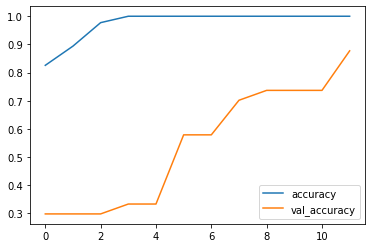

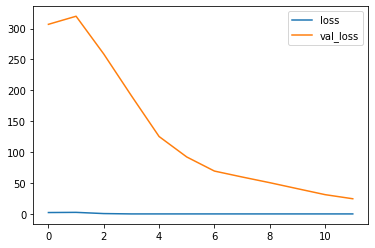

In [ ]:
# Converting history to data frame
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print('Loss=',loss)
print('Accuracy=',accuracy)

2/2 [==============================] - 1s 445ms/step - loss: 15.8578 - accuracy: 0.9206
Loss= 15.857762336730957
Accuracy= 0.920634925365448


In [ ]:
P = model.predict(x_test)
print('P=',P)
print('shape of P=',P.shape)


P= [[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.7408588e-13 1.0000000e+00 0.0000000e+00]
 [3.455

In [ ]:
# converting prediction to classes
y_pred = np.argmax(P, axis=1)
print('shape of y_pred=',y_pred.shape)

shape of y_pred= (63,)


In [ ]:
y_test = np.argmax(y_test, axis=1)
print('shape of y_test=', y_test.shape)



shape of y_test= (63,)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
np.set_printoptions(precision=2)
print(cm)

[[21  0  0]
 [ 5 16  0]
 [ 0  0 21]]


In [ ]:
cm_df = pd.DataFrame(cm, columns= ['PREDICTED C', 'PREDICTED N', 'PREDICTED R'], index = ['ACTUAL C', 'ACTUAL N', 'ACTUAL R'])

In [ ]:
cm_df

,PREDICTED C,PREDICTED N,PREDICTED R
ACTUAL C,21,0,0
ACTUAL N,5,16,0
ACTUAL R,0,0,21


In [ ]:
def multi_class_parameters(conf_matrix):
  ACC = (sum(conf_matrix.diagonal())/sum(sum(conf_matrix)))
  MC = 1-ACC
  [row, col]= conf_matrix.shape
  if(row>2):
    PR = [None] * row
    RC = [None] * row
    F1 = [None] * row
    SP = [None] * row
    ind = list(range(0,row))
    for cm in range(0,row):
      TN = None
      ind = list(range(0,row))
      PR[cm] = conf_matrix[cm,cm]/(conf_matrix[:,cm]).sum()
      RC[cm] = conf_matrix[cm,cm]/(conf_matrix[cm,:]).sum()
      F1[cm] = (2*(PR[cm])*(RC[cm]))/((PR[cm])+(RC[cm]))
      ind.pop(cm)
      TN = (conf_matrix[np.ix_(ind,ind)]).sum()
      SP[cm] = TN/(conf_matrix[ind,:]).sum()

    Avg_RC =sum(RC)/row
    Avg_SP = sum(SP)/row
    Avg_PR = sum(PR)/row
    Avg_F1 = sum(F1)/row
    print('1. Accuracy:',ACC)
    print('2. Mis_classification:', MC)
    print('3. Sensitivity (Recall):',Avg_RC)
    print('4. specificity:',Avg_SP)
    print('5. Precision:',Avg_PR)
    print('6. F_1 Score:',Avg_F1)
  else:
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    MC = 1-ACC
    ACC = (float(TP+TN)/float(TP+TN+FP+FN))
    RC = (TP/ float(TP+TN))
    SP = (TN/ float(TN+TF))
    PR = (TP/float(TP+FP))
    F1 = 2*((PR*RC)/(PR+RC))
    print('1. Accuracy:',ACC)
    print('2. Mis_classification:', MC)
    print('3. Sensitivity (Recall):',Avg_RC)
    print('4. specificity:',Avg_SP)
    print('5. Precision:',Avg_PR)
    print('6. F_1 Score:',Avg_F1)
multi_class_parameters(cm)





1. Accuracy: 0.9206349206349206
2. Mis_classification: 0.07936507936507942
3. Sensitivity (Recall): 0.9206349206349206
4. specificity: 0.9603174603174603
5. Precision: 0.9358974358974358
6. F_1 Score: 0.9194939620471535
